
# **Assignment for the Programming for Data Analysis**

****

The goal of this Notebook is to explain the use and purpose of the ``numpy.random`` package in Python.

### Table of content
[1. Purpose of the ``numpy.random`` package](#par1)<br>
[2. The use of "Simple random data" and "Permutation" functions](#par2)<br>
[3. The use and purpose of selected distributions functions](#par3)<br>
[3.1 Zipf distribution](#par3.1)<br>
[3.1.1 Theory](#par3.1.1)<br>
[3.1.2 Use of ``numpy.random.Generator.zipf``](#par3.1.2)<br>
[3.2 Weibull distribution](#par3.2)<br>
[3.2.1 Theory](#par3.2.1)<br>
[3.2.2 Use of ``numpy.random.Generator.weibull``](#par3.2.2)<br>
[3.3 Binomial distribution](#par3.3)<br>
[3.3.1 Theory](#par3.3.1)<br>
[3.3.2 Use of ``numpy.random.Generator.binomial``](#par3.3.2)<br>
[4. Purpose of seeds in generating pseudorandom numbers](#par4)<br>
[5. References](#ref)<br>
<hr>

### Import all the packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from math import factorial
from scipy.stats import binom, zipf, weibull_max

In [2]:
# Define the numpy psudorandom numbers Generator
rng = np.random.default_rng()

<a id="par1"></a>
## 1. Purpose of the ``numpy.random`` package

<a id="par2"></a>
## 2. The use of "Simple random data" and "Permutation" functions

<a id="par3"></a>
## 3. The use and purpose of selected distributions functions

<a id="par3.1"></a>
### 3.1 Zipf distribution

<a id="par3.1.1"></a>
#### 3.1.1 Theory

The Zipf distribution, is a discrete distribution (one of a family of related discrete power law probability distributions) commonly used in linguistics, insurance and the modelling of rare events [4] This distribution was named after American linguist George Kingsley Zipf, who popularized it while attempting to explain the strange phenomenon observed in distribution of words within any language: the frequency of occurence of any word seems to be inversyly proportional to its rank in the frequency table [3]. The second most used word will appear about half as often as the most used, the third one third as often, the fourth one fourth as often and so on [5]. Whether the most commonly used words are ranked across entire language or in just one book, almost every time this pattern emerges.

There any many other phenomenas that appear to follow the Zipf distribution [2]:
* Citations of scientific papers
* Web hits
* Copies of books sold
* Number of phone calls received
* Distribution of the first digits in any socially or naturally related datasets (budget, income tax or populations) - known as Benford's Law [6] 


The probability mass function for the Zipf distribution is described by the following function:

$$
P(k)=\frac{k^{-a}}{\zeta(a)}
$$

Where the $\zeta(a)$ is the Riemann Zeta function:
$$
\zeta(a)=\sum_{k=1}^\infty \frac{1}{k^a}
$$

For the populations with a finite number of elements $N$, the normalized frequency of the element of rank $n$ can be specified as:
$$
f(n;a,N)=\frac{n^{-a}}{\sum_{k=1}^N \frac{1}{n^a}}
$$
where $a$ is the exponent parameter characterizing the distribution [3]

<a id="par3.1.2"></a>
#### 3.1.2 Use of ``numpy.random.Generator.zipf``

The ``numpy.random.Generator.zipf`` function can be used to generate an array of psedorandom values that follow Zipf's distribution. It accepts 2 parameters:
* a - distribution parameter (must be greater than 1)
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

As a first step, let's generate example sample data using distribution:

In [30]:
# distribution parameter
a = 1.01
# array of 10000 psedorandom values that were pooled from Zipf's distribution
zipf_set = rng.zipf(a, 10000)

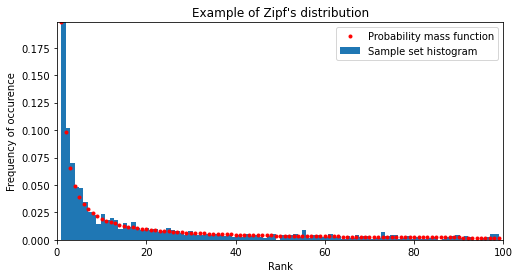

In [34]:
max_n = 100
count, bins, ignored = plt.hist(zipf_set[zipf_set<max_n], max_n, density=True, label='Sample set histogram')

x = np.arange(1., max_n)
# Calculate the y values using probability mass function of the Zipf distribution, from https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.zipf.html
y = zipf.pmf(x, a, loc=0)

# calculate the scaling factor, to match the scale of pmf and zipf_set histogram
scale = count.max()/y.max()

# add pmf to the plot
plt.plot(x, y*scale, 'r.', label='Probability mass function')

# define plot's parameters
plt.axis([0, max_n, 0, count.max()])
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Rank')
plt.ylabel('Frequency of occurence')
plt.title('Example of Zipf\'s distribution')
plt.legend()
plt.show()

Zipf's law is most easily observed by plotting the data on the log-log plot, with the x axis being log(rank order) and the y log(frequency). Let's re-plot the ``zipf`` array and the theoretical probability density distribution ``pdf`` using log-log plot:

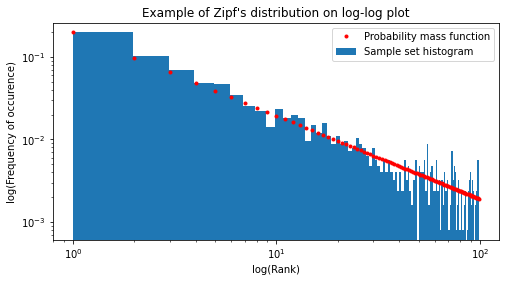

In [36]:
# Add histogram of the zipf_set to the plot
count, bins, ignored = plt.hist(zipf_set[zipf_set<max_n], max_n, density=True, label='Sample set histogram')

# add pmf to the plot
plt.plot(x, y*scale, 'r.', label='Probability mass function')

# define plot's parameters
plt.rcParams["figure.figsize"] = [8, 4]
plt.legend()
plt.title('Example of Zipf\'s distribution on log-log plot')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency of occurence)')
plt.yscale('log')
plt.xscale('log')
plt.show()

#### The effect of the distribution parameter 'a' on the Zipf distribution

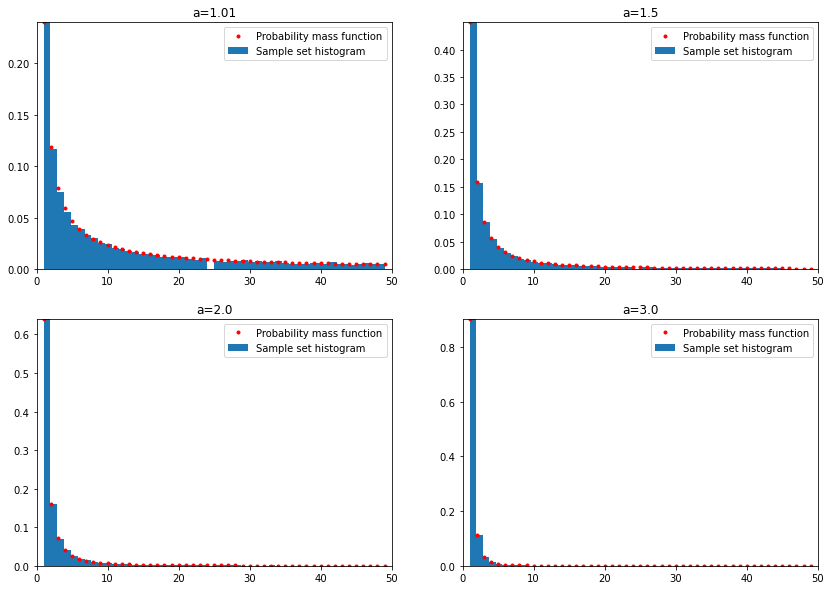

In [39]:
def sub_plt(p, a):
    max_n = 50
    
    # array of 10000 psedorandom values pooled from Zipf's distribution
    zipf_set = rng.zipf(a, 100000)
    
    # define x and y for the Zipf's probability mass function (pmf)
    x = np.arange(1., max_n)
    y = zipf.pmf(x, a, loc=0)

    # Add sample Zipf's set histogram to the plot
    count, bins, ignored = plt.hist(zipf_set[zipf_set<max_n], max_n, density=True, label='Sample set histogram')
    
    # calculate the scaling factor, to match the scale of pmf and zipf_set histogram
    scale = count.max()/y.max()
    
    p.plot(x, y*scale, 'r.', label='Probability mass function')
    
    # Plot's parameters
    p.legend()
    p.axis([0, max_n, 0, count.max()])
    p.title('a={}'.format(a))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [14, 10]

    
a=1.01
plt.subplot(2,2,1)
sub_plt(plt, a)

a=1.5
plt.subplot(2,2,2)
sub_plt(plt, a)

a=2.
plt.subplot(2,2,3)
sub_plt(plt, a)

a=3.
plt.subplot(2,2,4)
sub_plt(plt, a)

plt.show()

<a id="par3.2"></a>
### 3.2 Weibull distribution
    

<a id="par3.2.1"></a>
#### 3.2.1 Theory

The Weibull distribution is a continuous probability distribution named after Swedish mathematician Waloddi Weibull. It is being widely used in the reliability engineering, failure analysis and survival analysis [7]. For the general (3-parameter) Weibull distribution, the probability density function is defined as [8]:
$$
P(x)=\frac{a}{\alpha}*(\frac{x-\mu}{\alpha})^{(a-1)}*e^{-\frac{x-\mu}{\alpha}^{a}}
$$
where:
* $a$ is the shape parameter; this allows a distribution to take on a variety of shapes
* $\mu$ is the location parameter; the effect of this parameter is translation of the graph by the value of this parameter right (for $\mu>0$) or left (for $\mu<0$)
* $\alpha$ is the scale parameter; the effect of this parameter is to strech out the graph

When $\mu=0$ and the $\alpha=1$ the resulting distribution is called the standard (or one-parameter) Weibull distribution. In this case, the probability density function reduces to:
$$
P(x)=a*x^{(a-1)}*e^{-x^a}
$$

<a id="par3.2.2"></a>
#### 3.2.2 Use of ``numpy.random.Generator.weibull``

The ``numpy.random.Generator.weibull`` function can be used to generate an array of psedorandom values that follow Weibull's one-parameter distribution. The function accepts 2 parameters:
* a - shape parameter (must be equal or greater than 0)
* size - the size of the generated array. This parameter is optional, if no size is specified, a single value is returned

Let's generate example array:

In [ ]:
# shape parameter of the Weibull distribution
a = 2.5

# Array of a pseudorandom numbers pooled from the one-parameter Weibull distribution with the shape parameter a
weibull = rng.weibull(a, 1000)

In [ ]:
# define an array of 100 numbers spanning from 0 to the maximum number in the weibull array
x = np.arange(1, 100.)/100.*max(weibull)

In [ ]:
# define the probability density function for the standard (one-parameter) Weibull distribution
def pdf(x, a):
    return a  * x **(a - 1) * np.exp(-x**a)

In [ ]:
count, bins, ignored = plt.hist(weibull, 50)

scale = count.max()/pdf(x, a).max()
plt.plot(x, pdf(x, a)*scale)

plt.show()

#### The effect of the shape parameter on Weibull distribution

In [ ]:
def sub_plt(p, a):
    weibull = rng.weibull(a, 1000)
    x = np.arange(1, 100.)/100.*max(weibull)

    count, bins, ignored = p.hist(weibull, 50)
    scale = count.max()/pdf(x, a).max()
    p.plot(x, pdf(x, a)*scale)
    p.title('a={}'.format(a))

# as per How to increase the spacing between subplots in Matplotlib [9]
plt.rcParams["figure.figsize"] = [10, 7]
    
a=0.5
plt.subplot(2,2,1)
sub_plt(plt, a)

a=1.
plt.subplot(2,2,2)
sub_plt(plt, a)

a=2.
plt.subplot(2,2,3)
sub_plt(plt, a)

a=5.
plt.subplot(2,2,4)
sub_plt(plt, a)

plt.show()

<a id="par3.3"></a>
### 3.3 Binomial distribution

<a id="par3.3.1"></a>
#### 3.3.1 Theory

Binomial distribution is a discrete probability distribution used for calculating the probability of the outcome in a process, experiment or a survey that can have only 2 outcomes (hence the prefix "bi"): Success/Fail, Yes/No, Accept/Reject, Heads/Tails etc. To be able to use the Binomial distrubution, the following criteria has to be satisfied [10]:
* Number of trials or observations is fixed
* Each trial is independednt
* The probability of Success in each trial is exactly the same in each trial

The probability mass function for the binomial distribution is:
$$
P(N; n, p) = \frac{n!}{N!(n-N)!}*p^N*(1-p)^{n-N}
$$
where $n$ is the number of trails/observations, $N$ is the number of successes and $p$ is the probability of success.

<a id="par3.3.2"></a>
#### 3.3.2 Use of ``numpy.random.Generator.binomial``

In [ ]:
# result of flipping a coin 10 times, tested 1000 times.
n, p = 10, .5  # number of trials, probability of each trial
binom_set = rng.binomial(n, p, 1000)

In [ ]:
# define an array n+1 numbers from 0 to n
x = np.arange(0, n+1)

In [ ]:
count, bins, ignored = plt.hist(binom_set, n-1)

scale = count.max()/ binom.pmf(x, n, p, loc=0).max()
plt.plot(x, binom.pmf(x, n, p, loc=0)*scale,'r*')

plt.show()

<a id="par4"></a>
## 4. Purpose of seeds in generating pseudorandom numbers

<a id="ref"></a>
## 5. References

[[1] The Ultimate Markdown Guide (for Jupyter Notebook)](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)<br>
[[2] Power laws, Pareto distributions and Zipf’s law](https://arxiv.org/pdf/cond-mat/0412004.pdf)<br>
[[3] Zipf's law, Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)<br>
[[4] Zipf Distribution, Wolfram MathWorld](https://mathworld.wolfram.com/ZipfDistribution.html)<br>
[[5] The Zipf Mystery, Vsauce](https://www.youtube.com/watch?v=fCn8zs912OE)<br>
[[6] Benford's Law and Zipf's Law](http://www.cut-the-knot.org/do_you_know/zipfLaw.shtml)<br>
[[7] Weibull distribution, Wikipedia](https://en.wikipedia.org/wiki/Weibull_distribution)<br>
[[8] Weibull distribution](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm)<br>
[[9] How to increase the spacing between subplots in Matplotlib](https://www.tutorialspoint.com/how-to-increase-the-spacing-between-subplots-in-matplotlib-with-subplot2grid)<br>
[[10] What is a Binomial Distribution?](https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/)<br>

## End